In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
columns_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATION', 'B', 'LSTAT', 'MEDV']

In [3]:
df = pd.read_csv("housing.csv", names = columns_names, na_values = "?", sep = " ", skipinitialspace = True)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# We are going to split our data in 80% training and 20% test
training_data = df.sample(frac = 0.8, random_state = 0)
test_data = df.drop(training_data.index)

In [6]:
#Our input variable will be RM and our target MEDV

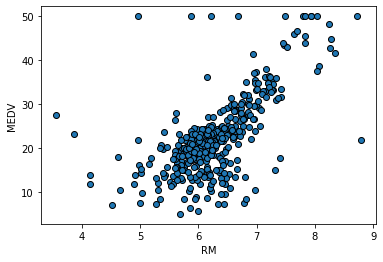

In [7]:
# ploting the training data
fig, ax = plt.subplots()
x = training_data['RM']
y = training_data['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

In [8]:
x_training = training_data['RM']
y_training = training_data['MEDV']
x_test = test_data['RM']
y_test = test_data['MEDV']

In [9]:
def linear_model():
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01,
                                         beta_1 = 0.9,
                                         beta_2 = 0.99,
                                         epsilon = 1e-05,
                                         amsgrad = False,
                                         name = 'Adam')
    model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])

    return model

In [10]:
model = linear_model()

In [12]:
# Training the model
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_training.shape[0]


In [14]:
# Callback - we can use earlystopping to avoid overfitting 
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = n_idle_epochs, min_delta = 0.0001)

In [16]:
prediction_list = []
checkpoint_path = "dados/"

In [18]:
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", verbose = 1, save_weights_only = True, save_freq = n_samples_save)

In [20]:
#saving the first version
model.save_weights(checkpoint_path.format(epoch = 0))

In [21]:
history = model.fit(x_training, y_training, batch_size = batch_size, epochs = n_epochs,
                   validation_split = 0.1, verbose = 1, callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 1s 164ms/step - loss: 452.0921 - mae: 19.4782 - mse: 452.0921 - val_loss: 534.0119 - val_mae: 20.7320 - val_mse: 534.0119
Epoch 2/4000
2/2 [==============================] - 0s 19ms/step - loss: 446.3742 - mae: 19.3332 - mse: 446.3742 - val_loss: 527.8677 - val_mae: 20.5862 - val_mse: 527.8677
Epoch 3/4000
2/2 [==============================] - 0s 30ms/step - loss: 440.6411 - mae: 19.1881 - mse: 440.6411 - val_loss: 521.7776 - val_mae: 20.4407 - val_mse: 521.7776
Epoch 4/4000
2/2 [==============================] - 0s 19ms/step - loss: 434.9854 - mae: 19.0430 - mse: 434.9854 - val_loss: 515.7437 - val_mae: 20.2955 - val_mse: 515.7437
Epoch 5/4000
2/2 [==============================] - 0s 21ms/step - loss: 429.2954 - mae: 18.8984 - mse: 429.2954 - val_loss: 509.7645 - val_mae: 20.1506 - val_mse: 509.7645
Epoch 6/4000
2/2 [==============================] - 0s 32ms/step - loss: 423.6808 - mae: 18.7542 - mse: 423.6808 - val_loss: 503.8285 

2/2 [==============================] - 0s 27ms/step - loss: 236.0083 - mae: 13.1298 - mse: 236.0083 - val_loss: 303.0116 - val_mae: 14.4001 - val_mse: 303.0116
Epoch 49/4000
2/2 [==============================] - 0s 19ms/step - loss: 232.6748 - mae: 13.0129 - mse: 232.6748 - val_loss: 299.3286 - val_mae: 14.2856 - val_mse: 299.3286
Epoch 50/4000
2/2 [==============================] - 0s 23ms/step - loss: 229.2976 - mae: 12.8967 - mse: 229.2976 - val_loss: 295.7073 - val_mae: 14.1721 - val_mse: 295.7073
Epoch 51/4000
2/2 [==============================] - 0s 26ms/step - loss: 226.0332 - mae: 12.7832 - mse: 226.0332 - val_loss: 292.1377 - val_mae: 14.0593 - val_mse: 292.1377
Epoch 52/4000
2/2 [==============================] - 0s 26ms/step - loss: 222.7506 - mae: 12.6688 - mse: 222.7506 - val_loss: 288.6229 - val_mae: 13.9472 - val_mse: 288.6229
Epoch 53/4000
2/2 [==============================] - 0s 18ms/step - loss: 219.5745 - mae: 12.5554 - mse: 219.5745 - val_loss: 285.1495 - val_mae

2/2 [==============================] - 0s 26ms/step - loss: 120.2559 - mae: 8.5471 - mse: 120.2559 - val_loss: 175.1705 - val_mae: 10.0137 - val_mse: 175.1705
Epoch 96/4000
2/2 [==============================] - 0s 21ms/step - loss: 118.6558 - mae: 8.4754 - mse: 118.6558 - val_loss: 173.2903 - val_mae: 9.9409 - val_mse: 173.2903
Epoch 97/4000
2/2 [==============================] - 0s 21ms/step - loss: 117.0600 - mae: 8.4050 - mse: 117.0600 - val_loss: 171.4473 - val_mae: 9.8688 - val_mse: 171.4473
Epoch 98/4000
2/2 [==============================] - 0s 27ms/step - loss: 115.4325 - mae: 8.3338 - mse: 115.4325 - val_loss: 169.6440 - val_mae: 9.7976 - val_mse: 169.6440
Epoch 99/4000
2/2 [==============================] - 0s 20ms/step - loss: 113.9101 - mae: 8.2659 - mse: 113.9101 - val_loss: 167.8661 - val_mae: 9.7265 - val_mse: 167.8661
Epoch 100/4000
2/2 [==============================] - 0s 23ms/step - loss: 112.3805 - mae: 8.1962 - mse: 112.3805 - val_loss: 166.1224 - val_mae: 9.6561 

2/2 [==============================] - 0s 24ms/step - loss: 70.6927 - mae: 6.0976 - mse: 70.6927 - val_loss: 116.3591 - val_mae: 7.6621 - val_mse: 116.3591
Epoch 143/4000
2/2 [==============================] - 0s 26ms/step - loss: 70.1452 - mae: 6.0651 - mse: 70.1452 - val_loss: 115.6355 - val_mae: 7.6341 - val_mse: 115.6355
Epoch 144/4000
2/2 [==============================] - 0s 24ms/step - loss: 69.6005 - mae: 6.0320 - mse: 69.6005 - val_loss: 114.9282 - val_mae: 7.6063 - val_mse: 114.9282
Epoch 145/4000
2/2 [==============================] - 0s 22ms/step - loss: 69.0500 - mae: 6.0004 - mse: 69.0500 - val_loss: 114.2366 - val_mae: 7.5787 - val_mse: 114.2366
Epoch 146/4000
2/2 [==============================] - 0s 26ms/step - loss: 68.5471 - mae: 5.9686 - mse: 68.5471 - val_loss: 113.5553 - val_mae: 7.5511 - val_mse: 113.5553
Epoch 147/4000
2/2 [==============================] - 0s 28ms/step - loss: 68.0441 - mae: 5.9383 - mse: 68.0441 - val_loss: 112.8920 - val_mae: 7.5239 - val_mse

2/2 [==============================] - 0s 18ms/step - loss: 56.7471 - mae: 5.2741 - mse: 56.7471 - val_loss: 96.4575 - val_mae: 6.8735 - val_mse: 96.4575
Epoch 191/4000
2/2 [==============================] - 0s 23ms/step - loss: 56.6609 - mae: 5.2710 - mse: 56.6609 - val_loss: 96.2771 - val_mae: 6.8676 - val_mse: 96.2771
Epoch 192/4000
2/2 [==============================] - 0s 23ms/step - loss: 56.5598 - mae: 5.2674 - mse: 56.5598 - val_loss: 96.1023 - val_mae: 6.8618 - val_mse: 96.1023
Epoch 193/4000
2/2 [==============================] - 0s 30ms/step - loss: 56.4781 - mae: 5.2651 - mse: 56.4781 - val_loss: 95.9287 - val_mae: 6.8560 - val_mse: 95.9287
Epoch 194/4000
2/2 [==============================] - 0s 17ms/step - loss: 56.3900 - mae: 5.2626 - mse: 56.3900 - val_loss: 95.7607 - val_mae: 6.8502 - val_mse: 95.7607
Epoch 195/4000
2/2 [==============================] - 0s 20ms/step - loss: 56.2982 - mae: 5.2608 - mse: 56.2982 - val_loss: 95.5960 - val_mae: 6.8445 - val_mse: 95.5960
E

2/2 [==============================] - 0s 29ms/step - loss: 55.0138 - mae: 5.2816 - mse: 55.0138 - val_loss: 92.1741 - val_mae: 6.7894 - val_mse: 92.1741
Epoch 239/4000
2/2 [==============================] - 0s 27ms/step - loss: 55.0115 - mae: 5.2822 - mse: 55.0115 - val_loss: 92.1580 - val_mae: 6.7892 - val_mse: 92.1580
Epoch 240/4000
2/2 [==============================] - 0s 20ms/step - loss: 55.0062 - mae: 5.2825 - mse: 55.0062 - val_loss: 92.1433 - val_mae: 6.7891 - val_mse: 92.1433
Epoch 241/4000
2/2 [==============================] - 0s 20ms/step - loss: 55.0021 - mae: 5.2831 - mse: 55.0021 - val_loss: 92.1227 - val_mae: 6.7889 - val_mse: 92.1227
Epoch 242/4000
2/2 [==============================] - 0s 26ms/step - loss: 54.9991 - mae: 5.2841 - mse: 54.9991 - val_loss: 92.0983 - val_mae: 6.7886 - val_mse: 92.0983
Epoch 243/4000
2/2 [==============================] - 0s 25ms/step - loss: 54.9949 - mae: 5.2849 - mse: 54.9949 - val_loss: 92.0751 - val_mae: 6.7884 - val_mse: 92.0751
E

2/2 [==============================] - 0s 25ms/step - loss: 54.8826 - mae: 5.2869 - mse: 54.8826 - val_loss: 91.8697 - val_mae: 6.7821 - val_mse: 91.8697
Epoch 287/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.8792 - mae: 5.2871 - mse: 54.8792 - val_loss: 91.8557 - val_mae: 6.7819 - val_mse: 91.8557
Epoch 288/4000
2/2 [==============================] - 0s 22ms/step - loss: 54.8749 - mae: 5.2875 - mse: 54.8749 - val_loss: 91.8396 - val_mae: 6.7816 - val_mse: 91.8396
Epoch 289/4000
2/2 [==============================] - 0s 17ms/step - loss: 54.8718 - mae: 5.2882 - mse: 54.8718 - val_loss: 91.8198 - val_mae: 6.7813 - val_mse: 91.8198
Epoch 290/4000
2/2 [==============================] - 0s 22ms/step - loss: 54.8699 - mae: 5.2890 - mse: 54.8699 - val_loss: 91.8029 - val_mae: 6.7811 - val_mse: 91.8029
Epoch 291/4000
2/2 [==============================] - 0s 22ms/step - loss: 54.8639 - mae: 5.2895 - mse: 54.8639 - val_loss: 91.7925 - val_mae: 6.7809 - val_mse: 91.7925
E

2/2 [==============================] - 0s 23ms/step - loss: 54.7072 - mae: 5.2949 - mse: 54.7072 - val_loss: 91.4573 - val_mae: 6.7708 - val_mse: 91.4573
Epoch 335/4000
2/2 [==============================] - 0s 23ms/step - loss: 54.7034 - mae: 5.2943 - mse: 54.7034 - val_loss: 91.4546 - val_mae: 6.7705 - val_mse: 91.4546
Epoch 336/4000
2/2 [==============================] - 0s 22ms/step - loss: 54.6982 - mae: 5.2942 - mse: 54.6982 - val_loss: 91.4436 - val_mae: 6.7702 - val_mse: 91.4436
Epoch 337/4000
2/2 [==============================] - 0s 25ms/step - loss: 54.6945 - mae: 5.2943 - mse: 54.6945 - val_loss: 91.4350 - val_mae: 6.7700 - val_mse: 91.4350
Epoch 338/4000
2/2 [==============================] - 0s 28ms/step - loss: 54.6901 - mae: 5.2947 - mse: 54.6901 - val_loss: 91.4201 - val_mae: 6.7696 - val_mse: 91.4201
Epoch 339/4000
2/2 [==============================] - 0s 22ms/step - loss: 54.6859 - mae: 5.2951 - mse: 54.6859 - val_loss: 91.4089 - val_mae: 6.7693 - val_mse: 91.4089
E

2/2 [==============================] - 0s 20ms/step - loss: 54.4679 - mae: 5.2773 - mse: 54.4679 - val_loss: 91.3490 - val_mae: 6.7574 - val_mse: 91.3490
Epoch 383/4000
2/2 [==============================] - 0s 27ms/step - loss: 54.4582 - mae: 5.2762 - mse: 54.4582 - val_loss: 91.3445 - val_mae: 6.7570 - val_mse: 91.3445
Epoch 384/4000
2/2 [==============================] - 0s 21ms/step - loss: 54.4539 - mae: 5.2758 - mse: 54.4539 - val_loss: 91.3483 - val_mae: 6.7568 - val_mse: 91.3483
Epoch 385/4000
2/2 [==============================] - 0s 22ms/step - loss: 54.4485 - mae: 5.2750 - mse: 54.4485 - val_loss: 91.3292 - val_mae: 6.7563 - val_mse: 91.3292
Epoch 386/4000
2/2 [==============================] - 0s 27ms/step - loss: 54.4400 - mae: 5.2763 - mse: 54.4400 - val_loss: 91.2858 - val_mae: 6.7557 - val_mse: 91.2858
Epoch 387/4000
2/2 [==============================] - 0s 22ms/step - loss: 54.4416 - mae: 5.2786 - mse: 54.4416 - val_loss: 91.2580 - val_mae: 6.7552 - val_mse: 91.2580
E

2/2 [==============================] - 0s 20ms/step - loss: 54.1477 - mae: 5.2555 - mse: 54.1477 - val_loss: 91.1876 - val_mae: 6.7394 - val_mse: 91.1876
Epoch 431/4000
2/2 [==============================] - 0s 23ms/step - loss: 54.1359 - mae: 5.2535 - mse: 54.1359 - val_loss: 91.1926 - val_mae: 6.7391 - val_mse: 91.1926
Epoch 432/4000
2/2 [==============================] - 0s 23ms/step - loss: 54.1305 - mae: 5.2524 - mse: 54.1305 - val_loss: 91.2005 - val_mae: 6.7388 - val_mse: 91.2005
Epoch 433/4000
2/2 [==============================] - 0s 42ms/step - loss: 54.1220 - mae: 5.2513 - mse: 54.1220 - val_loss: 91.1928 - val_mae: 6.7383 - val_mse: 91.1928
Epoch 434/4000
2/2 [==============================] - 0s 32ms/step - loss: 54.1151 - mae: 5.2512 - mse: 54.1151 - val_loss: 91.1807 - val_mae: 6.7379 - val_mse: 91.1807
Epoch 435/4000
2/2 [==============================] - 0s 32ms/step - loss: 54.1074 - mae: 5.2510 - mse: 54.1074 - val_loss: 91.1718 - val_mae: 6.7374 - val_mse: 91.1718
E

2/2 [==============================] - 0s 25ms/step - loss: 53.7678 - mae: 5.2365 - mse: 53.7678 - val_loss: 90.8187 - val_mae: 6.7169 - val_mse: 90.8187
Epoch 479/4000
2/2 [==============================] - 0s 19ms/step - loss: 53.7590 - mae: 5.2382 - mse: 53.7590 - val_loss: 90.7897 - val_mae: 6.7163 - val_mse: 90.7897
Epoch 480/4000
2/2 [==============================] - 0s 25ms/step - loss: 53.7517 - mae: 5.2392 - mse: 53.7517 - val_loss: 90.7737 - val_mae: 6.7157 - val_mse: 90.7737
Epoch 481/4000
2/2 [==============================] - 0s 23ms/step - loss: 53.7415 - mae: 5.2389 - mse: 53.7415 - val_loss: 90.7752 - val_mae: 6.7152 - val_mse: 90.7752
Epoch 482/4000
2/2 [==============================] - 0s 22ms/step - loss: 53.7325 - mae: 5.2380 - mse: 53.7325 - val_loss: 90.7717 - val_mae: 6.7147 - val_mse: 90.7717
Epoch 483/4000
2/2 [==============================] - 0s 25ms/step - loss: 53.7235 - mae: 5.2373 - mse: 53.7235 - val_loss: 90.7689 - val_mae: 6.7142 - val_mse: 90.7689
E

2/2 [==============================] - 0s 22ms/step - loss: 53.3312 - mae: 5.2053 - mse: 53.3312 - val_loss: 90.7218 - val_mae: 6.6929 - val_mse: 90.7218
Epoch 527/4000
2/2 [==============================] - 0s 20ms/step - loss: 53.3479 - mae: 5.2007 - mse: 53.3479 - val_loss: 90.7960 - val_mae: 6.6929 - val_mse: 90.7960
Epoch 528/4000
2/2 [==============================] - 0s 31ms/step - loss: 53.3276 - mae: 5.1967 - mse: 53.3276 - val_loss: 90.8124 - val_mae: 6.6925 - val_mse: 90.8124
Epoch 529/4000
2/2 [==============================] - 0s 20ms/step - loss: 53.3253 - mae: 5.1951 - mse: 53.3253 - val_loss: 90.8253 - val_mae: 6.6921 - val_mse: 90.8253
Epoch 530/4000
2/2 [==============================] - 0s 33ms/step - loss: 53.3196 - mae: 5.1942 - mse: 53.3196 - val_loss: 90.8052 - val_mae: 6.6915 - val_mse: 90.8052
Epoch 531/4000
2/2 [==============================] - 0s 20ms/step - loss: 53.3074 - mae: 5.1938 - mse: 53.3074 - val_loss: 90.7998 - val_mae: 6.6910 - val_mse: 90.7998
E

Epoch 574/4000
2/2 [==============================] - 0s 24ms/step - loss: 52.9075 - mae: 5.1763 - mse: 52.9075 - val_loss: 90.3915 - val_mae: 6.6669 - val_mse: 90.3915
Epoch 575/4000
2/2 [==============================] - 0s 30ms/step - loss: 52.8953 - mae: 5.1769 - mse: 52.8953 - val_loss: 90.3370 - val_mae: 6.6660 - val_mse: 90.3370
Epoch 576/4000
2/2 [==============================] - 0s 19ms/step - loss: 52.9015 - mae: 5.1800 - mse: 52.9015 - val_loss: 90.2690 - val_mae: 6.6650 - val_mse: 90.2690
Epoch 577/4000
2/2 [==============================] - 0s 22ms/step - loss: 52.8771 - mae: 5.1822 - mse: 52.8771 - val_loss: 90.2414 - val_mae: 6.6644 - val_mse: 90.2414
Epoch 578/4000
2/2 [==============================] - 0s 23ms/step - loss: 52.8751 - mae: 5.1845 - mse: 52.8751 - val_loss: 90.1944 - val_mae: 6.6635 - val_mse: 90.1944
Epoch 579/4000
2/2 [==============================] - 0s 24ms/step - loss: 52.8585 - mae: 5.1851 - mse: 52.8585 - val_loss: 90.1812 - val_mae: 6.6630 - val

2/2 [==============================] - 0s 53ms/step - loss: 52.4633 - mae: 5.1565 - mse: 52.4633 - val_loss: 89.9670 - val_mae: 6.6393 - val_mse: 89.9670
Epoch 623/4000
2/2 [==============================] - 0s 43ms/step - loss: 52.4518 - mae: 5.1579 - mse: 52.4518 - val_loss: 89.9121 - val_mae: 6.6384 - val_mse: 89.9121
Epoch 624/4000
2/2 [==============================] - 0s 45ms/step - loss: 52.4412 - mae: 5.1607 - mse: 52.4412 - val_loss: 89.8397 - val_mae: 6.6374 - val_mse: 89.8397
Epoch 625/4000
2/2 [==============================] - 0s 22ms/step - loss: 52.4397 - mae: 5.1649 - mse: 52.4397 - val_loss: 89.7639 - val_mae: 6.6363 - val_mse: 89.7639
Epoch 626/4000
2/2 [==============================] - 0s 38ms/step - loss: 52.4314 - mae: 5.1686 - mse: 52.4314 - val_loss: 89.7066 - val_mae: 6.6354 - val_mse: 89.7066
Epoch 627/4000
2/2 [==============================] - 0s 30ms/step - loss: 52.4194 - mae: 5.1718 - mse: 52.4194 - val_loss: 89.6206 - val_mae: 6.6342 - val_mse: 89.6206
E

2/2 [==============================] - 0s 28ms/step - loss: 52.0633 - mae: 5.1317 - mse: 52.0633 - val_loss: 89.7506 - val_mae: 6.6148 - val_mse: 89.7506
Epoch 671/4000
2/2 [==============================] - 0s 27ms/step - loss: 52.0543 - mae: 5.1303 - mse: 52.0543 - val_loss: 89.7508 - val_mae: 6.6143 - val_mse: 89.7508
Epoch 672/4000
2/2 [==============================] - 0s 28ms/step - loss: 52.0451 - mae: 5.1291 - mse: 52.0451 - val_loss: 89.7642 - val_mae: 6.6139 - val_mse: 89.7642
Epoch 673/4000
2/2 [==============================] - 0s 27ms/step - loss: 52.0373 - mae: 5.1277 - mse: 52.0373 - val_loss: 89.7748 - val_mae: 6.6135 - val_mse: 89.7748
Epoch 674/4000
2/2 [==============================] - 0s 27ms/step - loss: 52.0337 - mae: 5.1264 - mse: 52.0337 - val_loss: 89.7735 - val_mae: 6.6130 - val_mse: 89.7735
Epoch 675/4000
2/2 [==============================] - 0s 34ms/step - loss: 52.0219 - mae: 5.1260 - mse: 52.0219 - val_loss: 89.7383 - val_mae: 6.6122 - val_mse: 89.7383
E

2/2 [==============================] - 0s 48ms/step - loss: 51.6465 - mae: 5.1208 - mse: 51.6465 - val_loss: 89.1651 - val_mae: 6.5862 - val_mse: 89.1651
Epoch 719/4000
2/2 [==============================] - 0s 21ms/step - loss: 51.6467 - mae: 5.1245 - mse: 51.6467 - val_loss: 89.1120 - val_mae: 6.5852 - val_mse: 89.1120
Epoch 720/4000
2/2 [==============================] - 0s 29ms/step - loss: 51.6434 - mae: 5.1272 - mse: 51.6434 - val_loss: 89.0909 - val_mae: 6.5846 - val_mse: 89.0909
Epoch 721/4000
2/2 [==============================] - 0s 91ms/step - loss: 51.6348 - mae: 5.1269 - mse: 51.6348 - val_loss: 89.0977 - val_mae: 6.5841 - val_mse: 89.0977
Epoch 722/4000
2/2 [==============================] - 0s 23ms/step - loss: 51.6240 - mae: 5.1259 - mse: 51.6240 - val_loss: 89.1065 - val_mae: 6.5836 - val_mse: 89.1065
Epoch 723/4000
2/2 [==============================] - 0s 31ms/step - loss: 51.6093 - mae: 5.1237 - mse: 51.6093 - val_loss: 89.1501 - val_mae: 6.5834 - val_mse: 89.1501
E

2/2 [==============================] - 0s 24ms/step - loss: 51.2481 - mae: 5.0904 - mse: 51.2481 - val_loss: 89.0275 - val_mae: 6.5616 - val_mse: 89.0275
Epoch 767/4000
2/2 [==============================] - 0s 29ms/step - loss: 51.2399 - mae: 5.0903 - mse: 51.2399 - val_loss: 89.0139 - val_mae: 6.5610 - val_mse: 89.0139
Epoch 768/4000
2/2 [==============================] - 0s 45ms/step - loss: 51.2339 - mae: 5.0898 - mse: 51.2339 - val_loss: 89.0153 - val_mae: 6.5605 - val_mse: 89.0153
Epoch 769/4000
2/2 [==============================] - 0s 32ms/step - loss: 51.2226 - mae: 5.0892 - mse: 51.2226 - val_loss: 88.9974 - val_mae: 6.5599 - val_mse: 88.9974
Epoch 770/4000
2/2 [==============================] - ETA: 0s - loss: 52.1713 - mae: 5.0749 - mse: 52.171 - 0s 48ms/step - loss: 51.2170 - mae: 5.0896 - mse: 51.2170 - val_loss: 88.9911 - val_mae: 6.5593 - val_mse: 88.9911
Epoch 771/4000
2/2 [==============================] - 0s 61ms/step - loss: 51.2059 - mae: 5.0887 - mse: 51.2059 - va

Epoch 814/4000
2/2 [==============================] - 0s 39ms/step - loss: 50.8579 - mae: 5.0589 - mse: 50.8579 - val_loss: 88.8830 - val_mae: 6.5367 - val_mse: 88.8830
Epoch 815/4000
2/2 [==============================] - ETA: 0s - loss: 49.2534 - mae: 4.9566 - mse: 49.253 - 0s 70ms/step - loss: 50.8528 - mae: 5.0584 - mse: 50.8528 - val_loss: 88.8882 - val_mae: 6.5362 - val_mse: 88.8882
Epoch 816/4000
2/2 [==============================] - 0s 68ms/step - loss: 50.8444 - mae: 5.0580 - mse: 50.8444 - val_loss: 88.8590 - val_mae: 6.5355 - val_mse: 88.8590
Epoch 817/4000
2/2 [==============================] - 0s 65ms/step - loss: 50.8294 - mae: 5.0583 - mse: 50.8294 - val_loss: 88.8713 - val_mae: 6.5351 - val_mse: 88.8713
Epoch 818/4000
2/2 [==============================] - 0s 34ms/step - loss: 50.8198 - mae: 5.0565 - mse: 50.8198 - val_loss: 88.9091 - val_mae: 6.5349 - val_mse: 88.9091
Epoch 819/4000
2/2 [==============================] - 0s 41ms/step - loss: 50.8124 - mae: 5.0531 - ms

Epoch 862/4000
2/2 [==============================] - 0s 30ms/step - loss: 50.4851 - mae: 5.0398 - mse: 50.4851 - val_loss: 88.5028 - val_mae: 6.5109 - val_mse: 88.5028
Epoch 863/4000
2/2 [==============================] - 0s 23ms/step - loss: 50.4782 - mae: 5.0426 - mse: 50.4782 - val_loss: 88.4660 - val_mae: 6.5102 - val_mse: 88.4660
Epoch 864/4000
2/2 [==============================] - 0s 33ms/step - loss: 50.4709 - mae: 5.0439 - mse: 50.4709 - val_loss: 88.4526 - val_mae: 6.5096 - val_mse: 88.4526
Epoch 865/4000
2/2 [==============================] - 0s 28ms/step - loss: 50.4639 - mae: 5.0435 - mse: 50.4639 - val_loss: 88.4519 - val_mae: 6.5090 - val_mse: 88.4519
Epoch 866/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.4567 - mae: 5.0429 - mse: 50.4567 - val_loss: 88.4359 - val_mae: 6.5084 - val_mse: 88.4359
Epoch 867/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.4472 - mae: 5.0433 - mse: 50.4472 - val_loss: 88.3996 - val_mae: 6.5081 - val

2/2 [==============================] - 0s 19ms/step - loss: 50.1210 - mae: 5.0221 - mse: 50.1210 - val_loss: 88.2998 - val_mae: 6.4865 - val_mse: 88.2998
Epoch 910/4000
2/2 [==============================] - 0s 26ms/step - loss: 50.1076 - mae: 5.0166 - mse: 50.1076 - val_loss: 88.3860 - val_mae: 6.4867 - val_mse: 88.3860
Epoch 911/4000
2/2 [==============================] - 0s 29ms/step - loss: 50.1094 - mae: 5.0112 - mse: 50.1094 - val_loss: 88.4729 - val_mae: 6.4868 - val_mse: 88.4729
Epoch 912/4000
2/2 [==============================] - 0s 20ms/step - loss: 50.0982 - mae: 5.0064 - mse: 50.0982 - val_loss: 88.5288 - val_mae: 6.4867 - val_mse: 88.5288
Epoch 913/4000
2/2 [==============================] - 0s 31ms/step - loss: 50.0991 - mae: 5.0031 - mse: 50.0991 - val_loss: 88.5645 - val_mae: 6.4865 - val_mse: 88.5645
Epoch 914/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.0900 - mae: 5.0014 - mse: 50.0900 - val_loss: 88.5681 - val_mae: 6.4860 - val_mse: 88.5681
E

2/2 [==============================] - 0s 35ms/step - loss: 49.7878 - mae: 4.9994 - mse: 49.7878 - val_loss: 88.0689 - val_mae: 6.4632 - val_mse: 88.0689
Epoch 958/4000
2/2 [==============================] - 0s 29ms/step - loss: 49.7835 - mae: 4.9969 - mse: 49.7835 - val_loss: 88.0910 - val_mae: 6.4629 - val_mse: 88.0910
Epoch 959/4000
2/2 [==============================] - 0s 29ms/step - loss: 49.7706 - mae: 4.9950 - mse: 49.7706 - val_loss: 88.0876 - val_mae: 6.4624 - val_mse: 88.0876
Epoch 960/4000
2/2 [==============================] - 0s 34ms/step - loss: 49.7636 - mae: 4.9945 - mse: 49.7636 - val_loss: 88.0843 - val_mae: 6.4619 - val_mse: 88.0843
Epoch 961/4000
2/2 [==============================] - 0s 42ms/step - loss: 49.7581 - mae: 4.9942 - mse: 49.7581 - val_loss: 88.0948 - val_mae: 6.4615 - val_mse: 88.0948
Epoch 962/4000
2/2 [==============================] - 0s 27ms/step - loss: 49.7547 - mae: 4.9925 - mse: 49.7547 - val_loss: 88.1266 - val_mae: 6.4612 - val_mse: 88.1266
E

2/2 [==============================] - 0s 26ms/step - loss: 49.4337 - mae: 4.9637 - mse: 49.4337 - val_loss: 88.0007 - val_mae: 6.4395 - val_mse: 88.0007
Epoch 1006/4000
2/2 [==============================] - 0s 27ms/step - loss: 49.4332 - mae: 4.9666 - mse: 49.4332 - val_loss: 87.9322 - val_mae: 6.4385 - val_mse: 87.9322
Epoch 1007/4000
2/2 [==============================] - 0s 26ms/step - loss: 49.4230 - mae: 4.9690 - mse: 49.4230 - val_loss: 87.9014 - val_mae: 6.4378 - val_mse: 87.9014
Epoch 1008/4000
2/2 [==============================] - 0s 26ms/step - loss: 49.4111 - mae: 4.9694 - mse: 49.4111 - val_loss: 87.9000 - val_mae: 6.4373 - val_mse: 87.9000
Epoch 1009/4000
2/2 [==============================] - 0s 23ms/step - loss: 49.4040 - mae: 4.9686 - mse: 49.4040 - val_loss: 87.9019 - val_mae: 6.4368 - val_mse: 87.9019
Epoch 1010/4000
2/2 [==============================] - 0s 25ms/step - loss: 49.3967 - mae: 4.9677 - mse: 49.3967 - val_loss: 87.9002 - val_mae: 6.4363 - val_mse: 87.9

2/2 [==============================] - 0s 27ms/step - loss: 49.0857 - mae: 4.9363 - mse: 49.0857 - val_loss: 87.9662 - val_mae: 6.4260 - val_mse: 87.9662
Epoch 1054/4000
2/2 [==============================] - 0s 34ms/step - loss: 49.0846 - mae: 4.9345 - mse: 49.0846 - val_loss: 87.9593 - val_mae: 6.4255 - val_mse: 87.9593
Epoch 1055/4000
2/2 [==============================] - 0s 35ms/step - loss: 49.0711 - mae: 4.9341 - mse: 49.0711 - val_loss: 87.8988 - val_mae: 6.4229 - val_mse: 87.8988
Epoch 1056/4000
2/2 [==============================] - 0s 32ms/step - loss: 49.0578 - mae: 4.9360 - mse: 49.0578 - val_loss: 87.8224 - val_mae: 6.4195 - val_mse: 87.8224
Epoch 1057/4000
2/2 [==============================] - 0s 40ms/step - loss: 49.0432 - mae: 4.9383 - mse: 49.0432 - val_loss: 87.7278 - val_mae: 6.4152 - val_mse: 87.7278
Epoch 1058/4000
2/2 [==============================] - 0s 34ms/step - loss: 49.0369 - mae: 4.9420 - mse: 49.0369 - val_loss: 87.6056 - val_mae: 6.4128 - val_mse: 87.6

2/2 [==============================] - 0s 24ms/step - loss: 48.7395 - mae: 4.9269 - mse: 48.7395 - val_loss: 87.4244 - val_mae: 6.3961 - val_mse: 87.4244
Epoch 1102/4000
2/2 [==============================] - 0s 20ms/step - loss: 48.7308 - mae: 4.9265 - mse: 48.7308 - val_loss: 87.4475 - val_mae: 6.3964 - val_mse: 87.4475
Epoch 1103/4000
2/2 [==============================] - 0s 21ms/step - loss: 48.7243 - mae: 4.9242 - mse: 48.7243 - val_loss: 87.4985 - val_mae: 6.3973 - val_mse: 87.4985
Epoch 1104/4000
2/2 [==============================] - 0s 27ms/step - loss: 48.7171 - mae: 4.9212 - mse: 48.7171 - val_loss: 87.5296 - val_mae: 6.3979 - val_mse: 87.5296
Epoch 1105/4000
2/2 [==============================] - 0s 20ms/step - loss: 48.7092 - mae: 4.9195 - mse: 48.7092 - val_loss: 87.5453 - val_mae: 6.3984 - val_mse: 87.5453
Epoch 1106/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.7036 - mae: 4.9181 - mse: 48.7036 - val_loss: 87.5670 - val_mae: 6.3991 - val_mse: 87.5

2/2 [==============================] - 0s 20ms/step - loss: 48.4128 - mae: 4.9001 - mse: 48.4128 - val_loss: 87.3958 - val_mae: 6.3838 - val_mse: 87.3958
Epoch 1150/4000
2/2 [==============================] - 0s 27ms/step - loss: 48.4147 - mae: 4.8964 - mse: 48.4147 - val_loss: 87.4594 - val_mae: 6.3863 - val_mse: 87.4594
Epoch 1151/4000
2/2 [==============================] - 0s 21ms/step - loss: 48.4114 - mae: 4.8937 - mse: 48.4114 - val_loss: 87.4864 - val_mae: 6.3872 - val_mse: 87.4864
Epoch 1152/4000
2/2 [==============================] - 0s 23ms/step - loss: 48.4059 - mae: 4.8920 - mse: 48.4059 - val_loss: 87.4730 - val_mae: 6.3864 - val_mse: 87.4730
Epoch 1153/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.3952 - mae: 4.8923 - mse: 48.3952 - val_loss: 87.4193 - val_mae: 6.3840 - val_mse: 87.4193
Epoch 1154/4000
2/2 [==============================] - 0s 32ms/step - loss: 48.3866 - mae: 4.8939 - mse: 48.3866 - val_loss: 87.3597 - val_mae: 6.3813 - val_mse: 87.3

Epoch 1197/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.1127 - mae: 4.8850 - mse: 48.1127 - val_loss: 87.0327 - val_mae: 6.3633 - val_mse: 87.0327
Epoch 1198/4000
2/2 [==============================] - 0s 51ms/step - loss: 48.1051 - mae: 4.8841 - mse: 48.1051 - val_loss: 87.0552 - val_mae: 6.3635 - val_mse: 87.0552
Epoch 1199/4000
2/2 [==============================] - 0s 41ms/step - loss: 48.0996 - mae: 4.8819 - mse: 48.0996 - val_loss: 87.0892 - val_mae: 6.3641 - val_mse: 87.0892
Epoch 1200/4000
2/2 [==============================] - 0s 26ms/step - loss: 48.0913 - mae: 4.8801 - mse: 48.0913 - val_loss: 87.1143 - val_mae: 6.3644 - val_mse: 87.1143
Epoch 1201/4000
2/2 [==============================] - 0s 31ms/step - loss: 48.0857 - mae: 4.8780 - mse: 48.0857 - val_loss: 87.1498 - val_mae: 6.3649 - val_mse: 87.1498
Epoch 1202/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.0837 - mae: 4.8764 - mse: 48.0837 - val_loss: 87.1845 - val_mae: 6.3654

Epoch 1245/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.8062 - mae: 4.8644 - mse: 47.8062 - val_loss: 86.8685 - val_mae: 6.3473 - val_mse: 86.8685
Epoch 1246/4000
2/2 [==============================] - ETA: 0s - loss: 47.5101 - mae: 4.8252 - mse: 47.510 - 0s 26ms/step - loss: 47.8061 - mae: 4.8617 - mse: 47.8061 - val_loss: 86.9137 - val_mae: 6.3480 - val_mse: 86.9137
Epoch 1247/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.7953 - mae: 4.8589 - mse: 47.7953 - val_loss: 86.9228 - val_mae: 6.3480 - val_mse: 86.9228
Epoch 1248/4000
2/2 [==============================] - 0s 26ms/step - loss: 47.7870 - mae: 4.8580 - mse: 47.7870 - val_loss: 86.9067 - val_mae: 6.3474 - val_mse: 86.9067
Epoch 1249/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.7850 - mae: 4.8588 - mse: 47.7850 - val_loss: 86.8835 - val_mae: 6.3466 - val_mse: 86.8835
Epoch 1250/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.7734 - mae: 4.858

2/2 [==============================] - 0s 32ms/step - loss: 47.5127 - mae: 4.8401 - mse: 47.5127 - val_loss: 86.7682 - val_mae: 6.3329 - val_mse: 86.7682
Epoch 1293/4000
2/2 [==============================] - ETA: 0s - loss: 48.1560 - mae: 4.7724 - mse: 48.156 - 0s 36ms/step - loss: 47.5085 - mae: 4.8378 - mse: 47.5085 - val_loss: 86.8055 - val_mae: 6.3335 - val_mse: 86.8055
Epoch 1294/4000
2/2 [==============================] - 0s 33ms/step - loss: 47.5043 - mae: 4.8358 - mse: 47.5043 - val_loss: 86.8243 - val_mae: 6.3336 - val_mse: 86.8243
Epoch 1295/4000
2/2 [==============================] - 0s 30ms/step - loss: 47.4978 - mae: 4.8345 - mse: 47.4978 - val_loss: 86.8210 - val_mae: 6.3333 - val_mse: 86.8210
Epoch 1296/4000
2/2 [==============================] - 0s 44ms/step - loss: 47.4954 - mae: 4.8342 - mse: 47.4954 - val_loss: 86.7940 - val_mae: 6.3324 - val_mse: 86.7940
Epoch 1297/4000
2/2 [==============================] - 0s 26ms/step - loss: 47.4857 - mae: 4.8351 - mse: 47.4857

Epoch 1340/4000
2/2 [==============================] - 0s 27ms/step - loss: 47.2433 - mae: 4.8162 - mse: 47.2433 - val_loss: 86.7055 - val_mae: 6.3196 - val_mse: 86.7055
Epoch 1341/4000
2/2 [==============================] - 0s 44ms/step - loss: 47.2373 - mae: 4.8145 - mse: 47.2373 - val_loss: 86.7098 - val_mae: 6.3195 - val_mse: 86.7098
Epoch 1342/4000
2/2 [==============================] - 0s 30ms/step - loss: 47.2322 - mae: 4.8140 - mse: 47.2322 - val_loss: 86.6907 - val_mae: 6.3188 - val_mse: 86.6907
Epoch 1343/4000
2/2 [==============================] - 0s 40ms/step - loss: 47.2251 - mae: 4.8145 - mse: 47.2251 - val_loss: 86.6451 - val_mae: 6.3175 - val_mse: 86.6451
Epoch 1344/4000
2/2 [==============================] - 0s 30ms/step - loss: 47.2224 - mae: 4.8160 - mse: 47.2224 - val_loss: 86.6085 - val_mae: 6.3165 - val_mse: 86.6085
Epoch 1345/4000
2/2 [==============================] - 0s 31ms/step - loss: 47.2162 - mae: 4.8167 - mse: 47.2162 - val_loss: 86.6042 - val_mae: 6.3161

2/2 [==============================] - 0s 39ms/step - loss: 47.0094 - mae: 4.8034 - mse: 47.0094 - val_loss: 86.4688 - val_mae: 6.3040 - val_mse: 86.4688
Epoch 1388/4000
2/2 [==============================] - 0s 36ms/step - loss: 47.0010 - mae: 4.8029 - mse: 47.0010 - val_loss: 86.4899 - val_mae: 6.3043 - val_mse: 86.4899
Epoch 1389/4000
2/2 [==============================] - 0s 33ms/step - loss: 46.9993 - mae: 4.8016 - mse: 46.9993 - val_loss: 86.5207 - val_mae: 6.3048 - val_mse: 86.5207
Epoch 1390/4000
2/2 [==============================] - 0s 47ms/step - loss: 47.0042 - mae: 4.8002 - mse: 47.0042 - val_loss: 86.5184 - val_mae: 6.3045 - val_mse: 86.5184
Epoch 1391/4000
2/2 [==============================] - 0s 41ms/step - loss: 46.9916 - mae: 4.8002 - mse: 46.9916 - val_loss: 86.4683 - val_mae: 6.3032 - val_mse: 86.4683
Epoch 1392/4000
2/2 [==============================] - 0s 27ms/step - loss: 46.9886 - mae: 4.8020 - mse: 46.9886 - val_loss: 86.4412 - val_mae: 6.3024 - val_mse: 86.4

Epoch 1435/4000
2/2 [==============================] - 0s 28ms/step - loss: 46.7892 - mae: 4.7885 - mse: 46.7892 - val_loss: 86.3950 - val_mae: 6.2924 - val_mse: 86.3950
Epoch 1436/4000
2/2 [==============================] - 0s 38ms/step - loss: 46.7822 - mae: 4.7858 - mse: 46.7822 - val_loss: 86.4282 - val_mae: 6.2929 - val_mse: 86.4282
Epoch 1437/4000
2/2 [==============================] - 0s 35ms/step - loss: 46.7796 - mae: 4.7842 - mse: 46.7796 - val_loss: 86.4599 - val_mae: 6.2933 - val_mse: 86.4599
Epoch 1438/4000
2/2 [==============================] - 0s 25ms/step - loss: 46.7772 - mae: 4.7827 - mse: 46.7772 - val_loss: 86.4851 - val_mae: 6.2937 - val_mse: 86.4851
Epoch 1439/4000
2/2 [==============================] - 0s 36ms/step - loss: 46.7745 - mae: 4.7815 - mse: 46.7745 - val_loss: 86.5057 - val_mae: 6.2939 - val_mse: 86.5057
Epoch 1440/4000
2/2 [==============================] - 0s 41ms/step - loss: 46.7757 - mae: 4.7807 - mse: 46.7757 - val_loss: 86.5229 - val_mae: 6.2940

2/2 [==============================] - 0s 30ms/step - loss: 46.5683 - mae: 4.7815 - mse: 46.5683 - val_loss: 86.0076 - val_mae: 6.2733 - val_mse: 86.0076
Epoch 1484/4000
2/2 [==============================] - 0s 23ms/step - loss: 46.5674 - mae: 4.7828 - mse: 46.5674 - val_loss: 85.9837 - val_mae: 6.2725 - val_mse: 85.9837
Epoch 1485/4000
2/2 [==============================] - 0s 51ms/step - loss: 46.5628 - mae: 4.7833 - mse: 46.5628 - val_loss: 85.9827 - val_mae: 6.2722 - val_mse: 85.9827
Epoch 1486/4000
2/2 [==============================] - 0s 25ms/step - loss: 46.5640 - mae: 4.7826 - mse: 46.5640 - val_loss: 85.9889 - val_mae: 6.2722 - val_mse: 85.9889
Epoch 1487/4000
2/2 [==============================] - 0s 47ms/step - loss: 46.5567 - mae: 4.7826 - mse: 46.5567 - val_loss: 85.9741 - val_mae: 6.2716 - val_mse: 85.9741
Epoch 1488/4000
2/2 [==============================] - 0s 40ms/step - loss: 46.5480 - mae: 4.7821 - mse: 46.5480 - val_loss: 85.9908 - val_mae: 6.2718 - val_mse: 85.9

2/2 [==============================] - 0s 28ms/step - loss: 46.3627 - mae: 4.7543 - mse: 46.3627 - val_loss: 86.2020 - val_mae: 6.2674 - val_mse: 86.2020
Epoch 1532/4000
2/2 [==============================] - 0s 32ms/step - loss: 46.3508 - mae: 4.7548 - mse: 46.3508 - val_loss: 86.1721 - val_mae: 6.2665 - val_mse: 86.1721
Epoch 1533/4000
2/2 [==============================] - 0s 28ms/step - loss: 46.3476 - mae: 4.7556 - mse: 46.3476 - val_loss: 86.1400 - val_mae: 6.2656 - val_mse: 86.1400
Epoch 1534/4000
2/2 [==============================] - 0s 27ms/step - loss: 46.3402 - mae: 4.7561 - mse: 46.3402 - val_loss: 86.1211 - val_mae: 6.2650 - val_mse: 86.1211
Epoch 1535/4000
2/2 [==============================] - 0s 32ms/step - loss: 46.3367 - mae: 4.7566 - mse: 46.3367 - val_loss: 86.1065 - val_mae: 6.2645 - val_mse: 86.1065
Epoch 1536/4000
2/2 [==============================] - 0s 19ms/step - loss: 46.3323 - mae: 4.7565 - mse: 46.3323 - val_loss: 86.1008 - val_mae: 6.2641 - val_mse: 86.1

2/2 [==============================] - 0s 35ms/step - loss: 46.1434 - mae: 4.7463 - mse: 46.1434 - val_loss: 85.9287 - val_mae: 6.2510 - val_mse: 85.9287
Epoch 1579/4000
2/2 [==============================] - 0s 20ms/step - loss: 46.1405 - mae: 4.7455 - mse: 46.1405 - val_loss: 85.9419 - val_mae: 6.2511 - val_mse: 85.9419
Epoch 1580/4000
2/2 [==============================] - 0s 34ms/step - loss: 46.1332 - mae: 4.7449 - mse: 46.1332 - val_loss: 85.9312 - val_mae: 6.2506 - val_mse: 85.9312
Epoch 1581/4000
2/2 [==============================] - 0s 22ms/step - loss: 46.1301 - mae: 4.7449 - mse: 46.1301 - val_loss: 85.9135 - val_mae: 6.2500 - val_mse: 85.9135
Epoch 1582/4000
2/2 [==============================] - 0s 21ms/step - loss: 46.1223 - mae: 4.7453 - mse: 46.1223 - val_loss: 85.8690 - val_mae: 6.2488 - val_mse: 85.8690
Epoch 1583/4000
2/2 [==============================] - 0s 49ms/step - loss: 46.1174 - mae: 4.7467 - mse: 46.1174 - val_loss: 85.8204 - val_mae: 6.2474 - val_mse: 85.8

Epoch 1626/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.9319 - mae: 4.7282 - mse: 45.9319 - val_loss: 85.8963 - val_mae: 6.2394 - val_mse: 85.8963
Epoch 1627/4000
2/2 [==============================] - 0s 23ms/step - loss: 45.9312 - mae: 4.7289 - mse: 45.9312 - val_loss: 85.8837 - val_mae: 6.2389 - val_mse: 85.8837
Epoch 1628/4000
2/2 [==============================] - 0s 44ms/step - loss: 45.9230 - mae: 4.7282 - mse: 45.9230 - val_loss: 85.8955 - val_mae: 6.2390 - val_mse: 85.8955
Epoch 1629/4000
2/2 [==============================] - 0s 34ms/step - loss: 45.9182 - mae: 4.7278 - mse: 45.9182 - val_loss: 85.8872 - val_mae: 6.2386 - val_mse: 85.8872
Epoch 1630/4000
2/2 [==============================] - 0s 38ms/step - loss: 45.9132 - mae: 4.7275 - mse: 45.9132 - val_loss: 85.8809 - val_mae: 6.2382 - val_mse: 85.8809
Epoch 1631/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.9081 - mae: 4.7274 - mse: 45.9081 - val_loss: 85.8661 - val_mae: 6.2376

2/2 [==============================] - 0s 34ms/step - loss: 45.7178 - mae: 4.7206 - mse: 45.7178 - val_loss: 85.5922 - val_mae: 6.2215 - val_mse: 85.5922
Epoch 1675/4000
2/2 [==============================] - 0s 26ms/step - loss: 45.7153 - mae: 4.7201 - mse: 45.7153 - val_loss: 85.5850 - val_mae: 6.2211 - val_mse: 85.5850
Epoch 1676/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.7087 - mae: 4.7201 - mse: 45.7087 - val_loss: 85.5564 - val_mae: 6.2202 - val_mse: 85.5564
Epoch 1677/4000
2/2 [==============================] - 0s 26ms/step - loss: 45.7053 - mae: 4.7209 - mse: 45.7053 - val_loss: 85.5357 - val_mae: 6.2195 - val_mse: 85.5357
Epoch 1678/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.7020 - mae: 4.7213 - mse: 45.7020 - val_loss: 85.5172 - val_mae: 6.2188 - val_mse: 85.5172
Epoch 1679/4000
2/2 [==============================] - 0s 23ms/step - loss: 45.7008 - mae: 4.7220 - mse: 45.7008 - val_loss: 85.4966 - val_mae: 6.2181 - val_mse: 85.4

2/2 [==============================] - 0s 30ms/step - loss: 45.5252 - mae: 4.7164 - mse: 45.5252 - val_loss: 85.2447 - val_mae: 6.2017 - val_mse: 85.2447
Epoch 1723/4000
2/2 [==============================] - 0s 22ms/step - loss: 45.5207 - mae: 4.7148 - mse: 45.5207 - val_loss: 85.2761 - val_mae: 6.2023 - val_mse: 85.2761
Epoch 1724/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.5109 - mae: 4.7130 - mse: 45.5109 - val_loss: 85.3009 - val_mae: 6.2027 - val_mse: 85.3009
Epoch 1725/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.5145 - mae: 4.7120 - mse: 45.5145 - val_loss: 85.3148 - val_mae: 6.2028 - val_mse: 85.3148
Epoch 1726/4000
2/2 [==============================] - ETA: 0s - loss: 47.9204 - mae: 4.7462 - mse: 47.920 - 0s 20ms/step - loss: 45.4955 - mae: 4.7106 - mse: 45.4955 - val_loss: 85.2914 - val_mae: 6.2020 - val_mse: 85.2914
Epoch 1727/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.4959 - mae: 4.7116 - mse: 45.4959

Epoch 1770/4000
2/2 [==============================] - 0s 41ms/step - loss: 45.3045 - mae: 4.6910 - mse: 45.3045 - val_loss: 85.3657 - val_mae: 6.1939 - val_mse: 85.3657
Epoch 1771/4000
2/2 [==============================] - 0s 44ms/step - loss: 45.3018 - mae: 4.6912 - mse: 45.3018 - val_loss: 85.3559 - val_mae: 6.1934 - val_mse: 85.3559
Epoch 1772/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.2973 - mae: 4.6911 - mse: 45.2973 - val_loss: 85.3667 - val_mae: 6.1934 - val_mse: 85.3667
Epoch 1773/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.2925 - mae: 4.6900 - mse: 45.2925 - val_loss: 85.3947 - val_mae: 6.1939 - val_mse: 85.3947
Epoch 1774/4000
2/2 [==============================] - 0s 26ms/step - loss: 45.2887 - mae: 4.6890 - mse: 45.2887 - val_loss: 85.4140 - val_mae: 6.1941 - val_mse: 85.4140
Epoch 1775/4000
2/2 [==============================] - 0s 27ms/step - loss: 45.2847 - mae: 4.6882 - mse: 45.2847 - val_loss: 85.4247 - val_mae: 6.1941

2/2 [==============================] - 0s 32ms/step - loss: 45.1189 - mae: 4.6768 - mse: 45.1189 - val_loss: 85.2510 - val_mae: 6.1798 - val_mse: 85.2510
Epoch 1819/4000
2/2 [==============================] - 0s 20ms/step - loss: 45.0993 - mae: 4.6771 - mse: 45.0993 - val_loss: 85.2412 - val_mae: 6.1793 - val_mse: 85.2412
Epoch 1820/4000
2/2 [==============================] - 0s 24ms/step - loss: 45.0969 - mae: 4.6771 - mse: 45.0969 - val_loss: 85.2352 - val_mae: 6.1789 - val_mse: 85.2352
Epoch 1821/4000
2/2 [==============================] - 0s 23ms/step - loss: 45.0949 - mae: 4.6770 - mse: 45.0949 - val_loss: 85.2459 - val_mae: 6.1789 - val_mse: 85.2459
Epoch 1822/4000
2/2 [==============================] - 0s 24ms/step - loss: 45.0921 - mae: 4.6768 - mse: 45.0921 - val_loss: 85.2397 - val_mae: 6.1785 - val_mse: 85.2397
Epoch 1823/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.0858 - mae: 4.6760 - mse: 45.0858 - val_loss: 85.2663 - val_mae: 6.1789 - val_mse: 85.2

2/2 [==============================] - 0s 17ms/step - loss: 44.9153 - mae: 4.6644 - mse: 44.9153 - val_loss: 85.1614 - val_mae: 6.1666 - val_mse: 85.1614
Epoch 1866/4000
2/2 [==============================] - 0s 26ms/step - loss: 44.9116 - mae: 4.6635 - mse: 44.9116 - val_loss: 85.1779 - val_mae: 6.1668 - val_mse: 85.1779
Epoch 1867/4000
2/2 [==============================] - 0s 26ms/step - loss: 44.9082 - mae: 4.6633 - mse: 44.9082 - val_loss: 85.1894 - val_mae: 6.1668 - val_mse: 85.1894
Epoch 1868/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.9072 - mae: 4.6625 - mse: 44.9072 - val_loss: 85.2206 - val_mae: 6.1673 - val_mse: 85.2206
Epoch 1869/4000
2/2 [==============================] - 0s 27ms/step - loss: 44.9004 - mae: 4.6618 - mse: 44.9004 - val_loss: 85.2268 - val_mae: 6.1672 - val_mse: 85.2268
Epoch 1870/4000
2/2 [==============================] - 0s 22ms/step - loss: 44.8930 - mae: 4.6610 - mse: 44.8930 - val_loss: 85.2617 - val_mae: 6.1677 - val_mse: 85.2

Epoch 1913/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.7388 - mae: 4.6491 - mse: 44.7388 - val_loss: 85.2621 - val_mae: 6.1580 - val_mse: 85.2621
Epoch 1914/4000
2/2 [==============================] - 0s 27ms/step - loss: 44.7356 - mae: 4.6481 - mse: 44.7356 - val_loss: 85.2874 - val_mae: 6.1584 - val_mse: 85.2874
Epoch 1915/4000
2/2 [==============================] - 0s 21ms/step - loss: 44.7366 - mae: 4.6474 - mse: 44.7366 - val_loss: 85.2882 - val_mae: 6.1582 - val_mse: 85.2882
Epoch 1916/4000
2/2 [==============================] - 0s 22ms/step - loss: 44.7300 - mae: 4.6471 - mse: 44.7300 - val_loss: 85.2540 - val_mae: 6.1572 - val_mse: 85.2540
Epoch 1917/4000
2/2 [==============================] - 0s 29ms/step - loss: 44.7244 - mae: 4.6474 - mse: 44.7244 - val_loss: 85.2235 - val_mae: 6.1563 - val_mse: 85.2235
Epoch 1918/4000
2/2 [==============================] - 0s 30ms/step - loss: 44.7202 - mae: 4.6476 - mse: 44.7202 - val_loss: 85.1945 - val_mae: 6.1555

2/2 [==============================] - 0s 23ms/step - loss: 44.5711 - mae: 4.6407 - mse: 44.5711 - val_loss: 85.0294 - val_mae: 6.1427 - val_mse: 85.0294
Epoch 1962/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.5715 - mae: 4.6395 - mse: 44.5715 - val_loss: 85.0906 - val_mae: 6.1439 - val_mse: 85.0906
Epoch 1963/4000
2/2 [==============================] - 0s 25ms/step - loss: 44.5681 - mae: 4.6385 - mse: 44.5681 - val_loss: 85.1313 - val_mae: 6.1446 - val_mse: 85.1313
Epoch 1964/4000
2/2 [==============================] - 0s 22ms/step - loss: 44.5666 - mae: 4.6378 - mse: 44.5666 - val_loss: 85.1506 - val_mae: 6.1448 - val_mse: 85.1506
Epoch 1965/4000
2/2 [==============================] - 0s 23ms/step - loss: 44.5625 - mae: 4.6371 - mse: 44.5625 - val_loss: 85.1479 - val_mae: 6.1445 - val_mse: 85.1479
Epoch 1966/4000
2/2 [==============================] - 0s 28ms/step - loss: 44.5602 - mae: 4.6371 - mse: 44.5602 - val_loss: 85.1418 - val_mae: 6.1441 - val_mse: 85.1

In [23]:
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [24]:
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [27]:
steps = pd.RangeIndex(start = 0, stop = num_values)
df2 = pd.DataFrame(values, steps, columns = ["Training MSE", "Validation MSE"])
df2.head()

,Training MSE,Validation MSE
0,452.092133,534.011902
1,446.374237,527.867737
2,440.641144,521.777649
3,434.985413,515.743713
4,429.295380,509.764526


<AxesSubplot:>

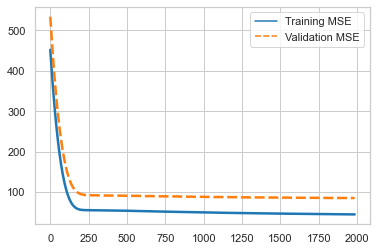

In [28]:
# Ploting
sns.set(style = "whitegrid")
sns.lineplot(data = df2, palette = "tab10", linewidth = 2.5)


In [31]:
prediction = model.predict(x_test).flatten()

In [32]:
prediction

array([20.976885, 18.598063, 23.860834, 21.376291, 20.659704, 20.753687,
       24.448195, 21.946032, 21.129599, 20.94164 , 25.746267, 23.402689,
       21.335173, 22.727224, 23.23823 , 21.664095, 26.868132, 23.332209,
       29.270445, 20.078218, 20.530485, 21.076735, 19.37338 , 20.976885,
       19.150183, 23.484922, 22.868193, 14.645113, 17.452705, 34.90325 ,
       21.546625, 18.439474, 20.125208, 22.803583, 31.320341, 24.26024 ,
       21.852053, 27.872522, 25.652292, 31.96644 , 27.455492, 30.40993 ,
       31.837221, 17.452705, 23.056147, 23.261724, 18.562822, 23.526037,
       36.83568 , 35.038345, 18.36899 , 34.445114, 30.88569 , 25.805006,
       23.614141, 22.803583, 26.010584, 27.69631 , 24.653776, 24.283735,
       23.161871, 19.23829 , 23.390944, 22.809454, 21.170713, 20.336657,
       21.299932, 22.198595, 21.699339, 21.611235, 26.920992, 24.765375,
       11.367628, 14.374926, 17.370474, 23.332209, 17.740515, 18.198656,
       23.367449, 21.558374, 20.342531, 25.84612 , 